### Global Average Land Temperatures by Country

Temperature data from around the planet is downloaded and ready to analyse.

For this, I will need pandas, seaborn, matplotlib and stats from scipy.

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [167]:
df_original = pd.read_csv('C:/Users/phpunsal/Documents/Data_Analytics/GlobalLandTemperaturesByCountry.csv')
df = df_original.copy()

Once uploaded onto the workbook, we can look at how the data is laid out using the `.head()` method:

In [168]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


This shows that the dates go back to 1743 (at least for Åland), with 4 columns of data, and at least a few NaN values

Next, I can use the `.describe()` method to give different view of the data:

In [169]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


It can be noted from the count, that there are not the same number of data points for each column

In [170]:
df.describe(include=['O'])

,dt,Country
count,577462,577462
unique,3239,243
top,2013-09-01,Åland
freq,243,3239


Here, I can describe as above, but group by country. This indicates quite a lot of variation between the number Temperature data points
and the earliest date a temperature was recorded.

In [171]:
df.groupby(by='Country').describe(include = 'O')

dt                        
               count unique         top freq
Country                                     
Afghanistan     2106   2106  1838-04-01    1
Africa          1965   1965  1850-01-01    1
Albania         3239   3239  1743-11-01    1
Algeria         2721   2721  1787-01-01    1
American Samoa  1761   1761  1867-01-01    1
...              ...    ...         ...  ...
Western Sahara  2721   2721  1787-01-01    1
Yemen           1653   1653  1876-01-01    1
Zambia          1965   1965  1850-01-01    1
Zimbabwe        1965   1965  1850-01-01    1
Åland           3239   3239  1743-11-01    1

[243 rows x 4 columns]

Next, `.info()` is used to generate an overview of the entries of each column and the data types.

Its worth noting that there are approximately 32,000 NaN values in the AverageTemperature and AverageTemperatureUncertainty columns.


The 'dt' column date is also an object datatype, and will need converting into a DateTime format later.


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


Then, I can create a list of Countries, using the `.unique()` method, so I can see what countries are in the dataset:

In [173]:
country_list = df_clean['Country'].unique() 
print(country_list)

['Åland' 'Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antigua And Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bonaire, Saint Eustatius And Saba'
 'Bosnia And Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' "Côte D'Ivoire" 'Cambodia'
 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo (Democratic Republic Of The)' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic'
 'Denmark (Europe)' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Europe' 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States Of Micronesia' '

Now I know more about the dataset, I will start making some changes.

First, I'll create a new dataframe called df_nonan (using `.copy()` to avoid changing the original df) and use the `.dropna()` method to remove the NaN values:

In [174]:
df_nonan = df.copy()

df_nonan = df_nonan.dropna() 

Next, as mentioned earlier, I want the 'dt' column to be in Datetime format:

In [175]:
df_clean = df_nonan.copy()
df_clean['dt'] = pd.to_datetime(df_clean['dt'])

I'm going to change the names of the columns:

In [176]:
rename_map = {
    'dt' : 'Date',
    'AverageTemperature' : 'AverageTemp',
    'AverageTemperatureUncertainty' : 'MeasurementUncertainty',
}

df_clean.rename(columns=rename_map, inplace=True)
df_clean.head()

,Date,AverageTemp,MeasurementUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


Next, I'd like to see the data for one country. I'll choose the Seychelles (as its where my wife and I went on our honeymoon).

I'll create a df just for the Seychelles:

In [177]:
seychelles_change = df_clean[df_clean['Country']=='Seychelles']
seychelles_change.head()

,Date,AverageTemp,MeasurementUncertainty,Country
463443,1787-01-01,27.586,2.751,Seychelles
463444,1787-02-01,26.732,2.277,Seychelles
463445,1787-03-01,27.355,2.443,Seychelles
463446,1787-04-01,27.018,1.531,Seychelles
463447,1787-05-01,27.872,3.249,Seychelles


Next, I'd like to try filtering by month and then by country, to return some really useful data:

In [178]:
jan = 1
jan_df = df_clean[df_clean['Date'].dt.month==jan]
seychelles_jan = jan_df[jan_df['Country']=='Seychelles']
seychelles_jan.head()

,Date,AverageTemp,MeasurementUncertainty,Country
463443,1787-01-01,27.586,2.751,Seychelles
463467,1789-01-01,27.121,3.586,Seychelles
463479,1790-01-01,26.678,2.836,Seychelles
463491,1791-01-01,27.441,4.294,Seychelles
463503,1792-01-01,24.427,2.966,Seychelles


Next, I want to have a look at these uncertainty measurements:

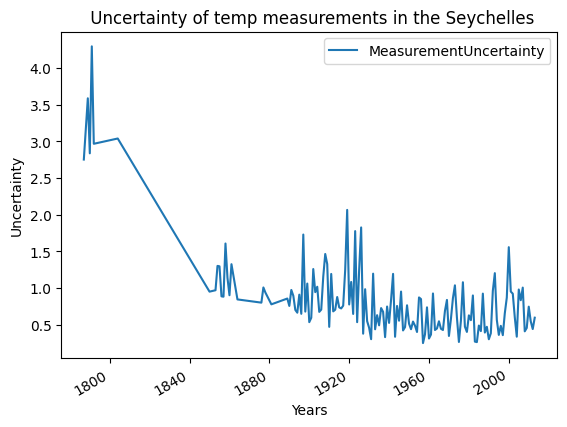

In [179]:
#plot of the uncertainty of measurements over the years. I decided from around 1880, measurements are more reliable and without gaps. 
#Straight gaps are from removed NaN values
seychelles_jan.plot(x='Date', y='MeasurementUncertainty', kind='line',\
                    title=' Uncertainty of temp measurements in the Seychelles',\
                   xlabel='Years', ylabel='Uncertainty');

From the above graph, I can see that prior to 1880, there is a lot of uncertainty with regards to the temperature measurements.

There is also quite a few gaps in the data (straight lines between the peaks). 

Because of this, I will use the measurements taken after 1880, using the `.xlim()` method.

I can the plot a line graph showing the Average Temperature measurments for the Seychelles during January:

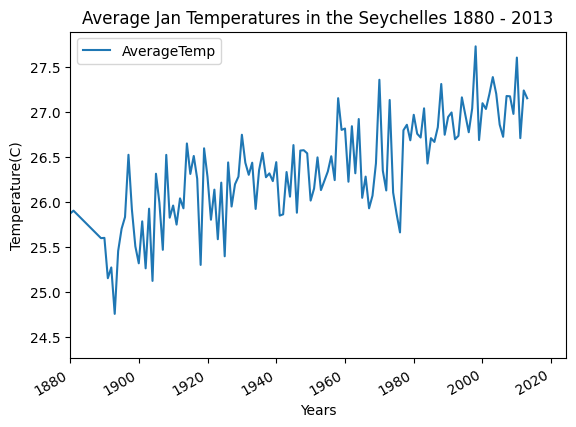

In [180]:
plt.figure 
seychelles_jan.plot(x='Date', y='AverageTemp', kind='line',\
                    title='Average Jan Temperatures in the Seychelles 1880 - 2013',\
                   xlabel='Years', ylabel='Temperature(C)')

plt.xlim(pd.Timestamp(f'{1880}-01-01'), None); 


The graph looks good and shows the data well, but it was a long process just for one graph, so I'd like to create a function to speed up the creation of graphs. I also think a rolling average would help improve the visualisation of this data.

I'd like the user to input the month as its name, so I need to create a dictionary to convert the name to a number, for coding purposes. I also would like to use the month name in the graph labels, so I end up needing to create a 2nd dictionary to convert the month number back into the month name.

Next, onto the graph function itself.

I create a function called 'average_month_temp_trend' which takes the parameters 'df', 'country', 'month' and 'rolling' (rolling average years).

The function creates a new df, removes the NaN values, converts the 'Date' column to datetime, applies the month_name and month_number functions, 
then filters for country and month, adds a column for rolling average, then plots this as a line graph:

In [182]:
def month_name_to_number(month_name): #this is so a user can search by month name, but its needed as an integer for filtering purposes
    month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                  'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    return month_dict.get(month_name, None)

def number_to_month_name(month_number):  #needed later to switch the month integer back into the name for title purposes
    month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                  7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    return month_dict.get(month_number, None)

def average_month_temp_trend(df, country, month, rolling):
    df_clean = df.dropna().copy() #remove NaN values

    df_clean['dt'] = pd.to_datetime(df_clean['dt']) #convert dt to datetime

    if isinstance(month, str): #checks if month is string, then convert to integer, but if already converted to 
                               #integer (as in the title later) then convert back to month as string
        month_number = month_name_to_number(month)
    else:
        month_number = month
        
#filtering for country and month   
    filter_df = df_clean.copy()
    filter_df = filter_df[(filter_df['Country'] == country) & (filter_df['dt'].dt.month == month_number)]
    
#adding a column for rolling average temperature
    filter_df['RollingAverageTemp'] = filter_df['AverageTemperature'].rolling(rolling).mean()

    plt.figure()
    plt.plot(filter_df['dt'], filter_df['AverageTemperature'])
    plt.plot(filter_df['dt'], filter_df['RollingAverageTemp'])
    plt.title(f'Average {number_to_month_name(month_number)} Temperatures in {country} 1880 - 2013')
    plt.xlabel('Years')
    plt.ylabel('Temperature(C)')
    plt.xlim(pd.Timestamp(f'{1880}-01-01'), None)
    plt.legend(['Average Temperature', f'{rolling} year Rolling Average'])
    
#plot graph from 1880 of average temp for given month for given country with rolling average too
    plt.show();

This can then simply be used to create a graph of any country in the data, for any month, with however long a rolling average is needed:

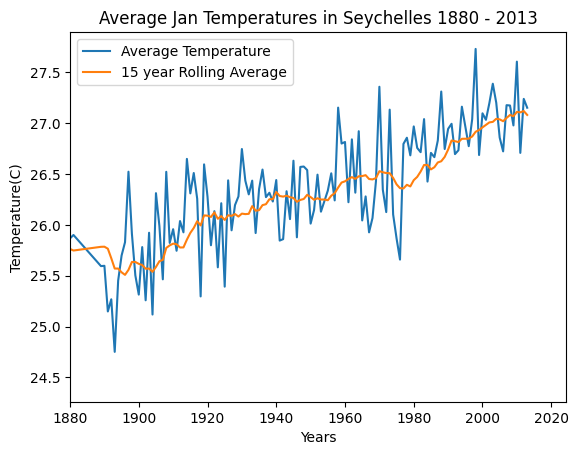

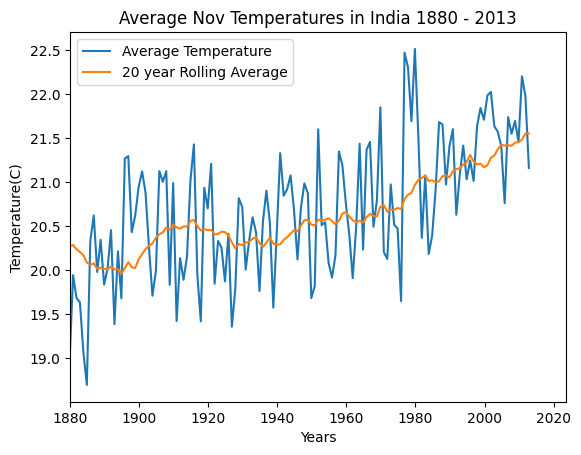

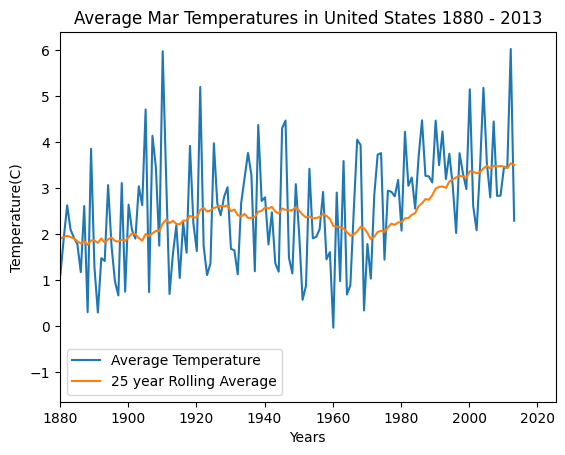

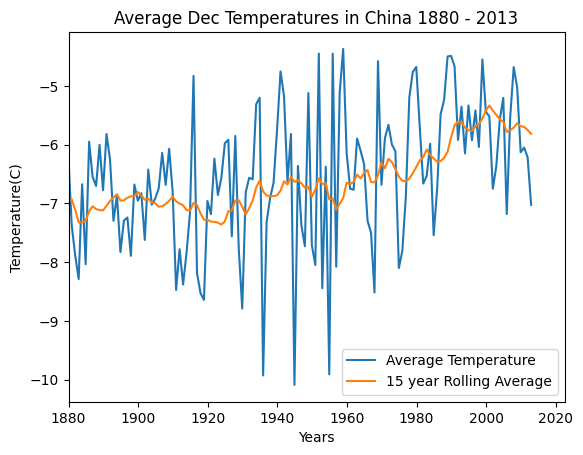

In [183]:
average_month_temp_trend(df, 'Seychelles', 'Jan', 15)

average_month_temp_trend(df, 'India', 'Nov', 20)

average_month_temp_trend(df, 'United States', 'Mar', 25)

average_month_temp_trend(df, 'China', 'Dec', 15)

Now, from this data visualisation it is quite clear to see that average temperatures are rising, as every graph shows an increase.

I will next create a new function that produces a histogram of the average temperatures for that country and month, to observe the distribution:

In [191]:
def average_month_temp_distribution(df, country, month):
    df_clean = df.dropna().copy() #remove NaN values

    df_clean['dt'] = pd.to_datetime(df_clean['dt']) #convert dt to datetime

    if isinstance(month, str): #checks if month is string, then convert to integer, but if already converted to 
                               #integer (as in the title later) then convert back to month as string
        month_number = month_name_to_number(month)
    else:
        month_number = month
#filtering for country and month
    filter_df = df_clean.copy()
    filter_df = filter_df[(filter_df['Country'] == country) & (filter_df['dt'].dt.month == month_number)]

    plt.figure()
    sns.histplot(filter_df['AverageTemperature'], kde=True)
    
    plt.title(f'Distribution of {number_to_month_name(month_number)} Temperatures in {country} 1880 - 2013')
    plt.xlabel('Temperature(C)')
    plt.ylabel('Occurrences')
    plt.show();

    print (f'The mean temp is {round(filter_df.AverageTemperature.mean(), 1)} degrees Celcius.')
    print (f'The median temp is {round(filter_df.AverageTemperature.median(), 1)} degrees Celcius.')
    print (f'The mode temp is {stats.mode(filter_df.AverageTemperature)} degrees Celcius.');

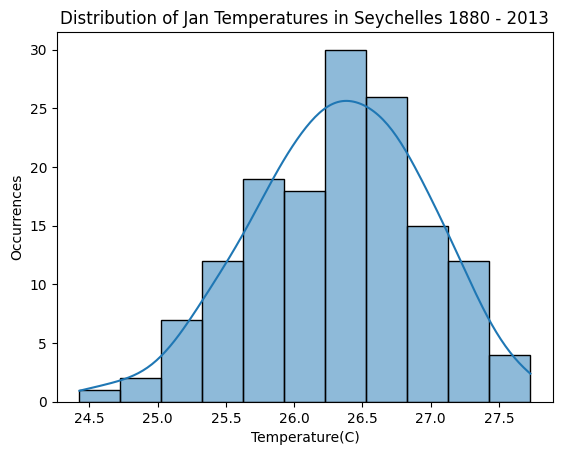

The mean temp is 26.3 degrees Celcius.
The median temp is 26.3 degrees Celcius.
The mode temp is ModeResult(mode=25.927, count=2) degrees Celcius.


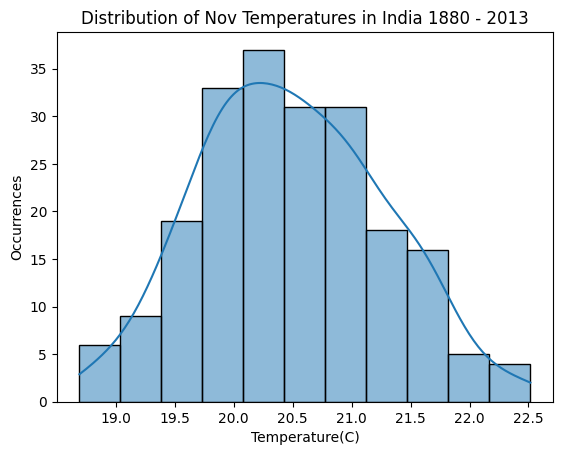

The mean temp is 20.5 degrees Celcius.
The median temp is 20.5 degrees Celcius.
The mode temp is ModeResult(mode=19.943, count=2) degrees Celcius.


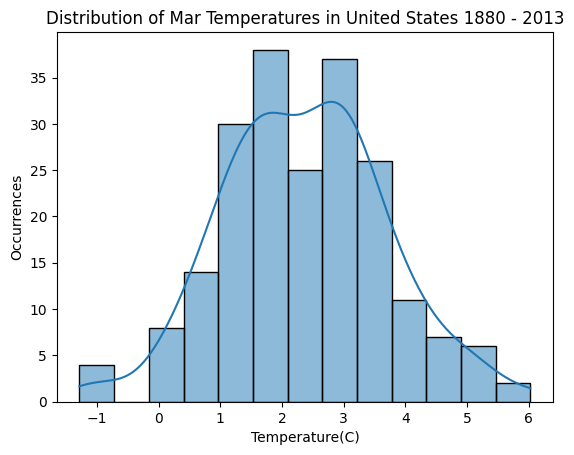

The mean temp is 2.4 degrees Celcius.
The median temp is 2.4 degrees Celcius.
The mode temp is ModeResult(mode=1.227, count=2) degrees Celcius.


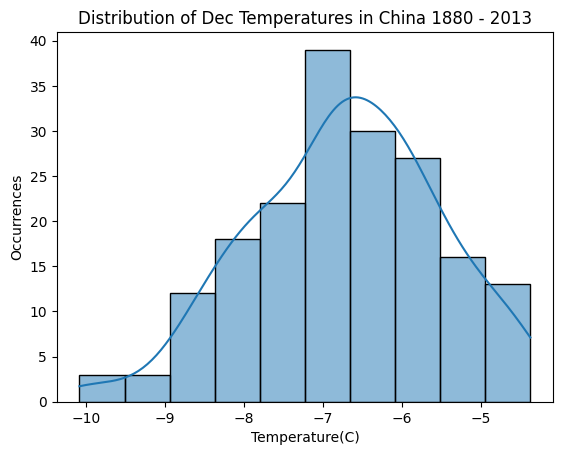

The mean temp is -6.7 degrees Celcius.
The median temp is -6.7 degrees Celcius.
The mode temp is ModeResult(mode=-6.747999999999998, count=3) degrees Celcius.


In [192]:
average_month_temp_distribution(df, 'Seychelles', 'Jan')

average_month_temp_distribution(df, 'India', 'Nov')

average_month_temp_distribution(df, 'United States', 'Mar')

average_month_temp_distribution(df, 'China', 'Dec')

It can be seen from this sample that generally, the average temperatures are normally distributed, but what if we do the same, but with only the last 30 years:

In [193]:
def average_month_temp_distribution_30yr(df, country, month):
    df_clean = df.dropna().copy() 
    df_clean = df_clean[df_clean['dt']>='1983-01-01']
    df_clean['dt'] = pd.to_datetime(df_clean['dt']) 

    if isinstance(month, str): 
        month_number = month_name_to_number(month)
    else:
        month_number = month

    filter_df = df_clean.copy()
    filter_df = filter_df[(filter_df['Country'] == country) & (filter_df['dt'].dt.month == month_number)]
    plt.figure()
    sns.histplot(filter_df['AverageTemperature'], kde=True)
    
    plt.title(f'Distribution of {number_to_month_name(month_number)} Temperatures in {country} 1983 - 2013')
    plt.xlabel('Temperature(C)')
    plt.ylabel('Occurrences')
    plt.show()
    print (f'The mean temp is {round(filter_df.AverageTemperature.mean(), 1)} degrees Celcius.')
    print (f'The median temp is {round(filter_df.AverageTemperature.median(), 1)} degrees Celcius.')
    print (f'The mode temp is {stats.mode(filter_df.AverageTemperature)} degrees Celcius.');

Comparing the two histograms below, you can notice that the last 30 years, the distribution has shifted up. 26.3 was the mean temp between 1880 and 2013, but between 1983 and 2013, this has shifted up to 27.0. 

The distribution is also no longer as normally distributed, also suggesting temperatures are shifting away from the historical mean.

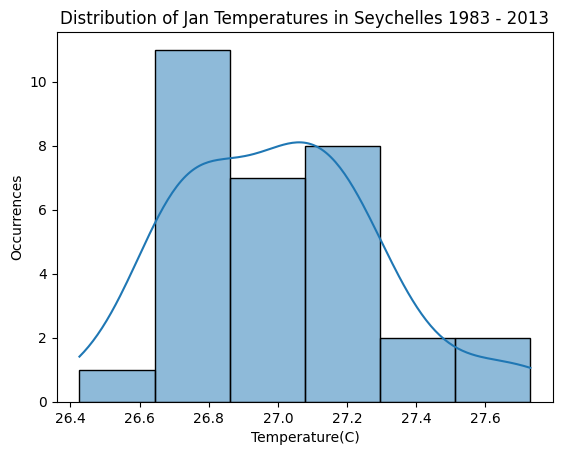

The mean temp is 27.0 degrees Celcius.
The median temp is 27.0 degrees Celcius.
The mode temp is ModeResult(mode=26.708, count=2) degrees Celcius.


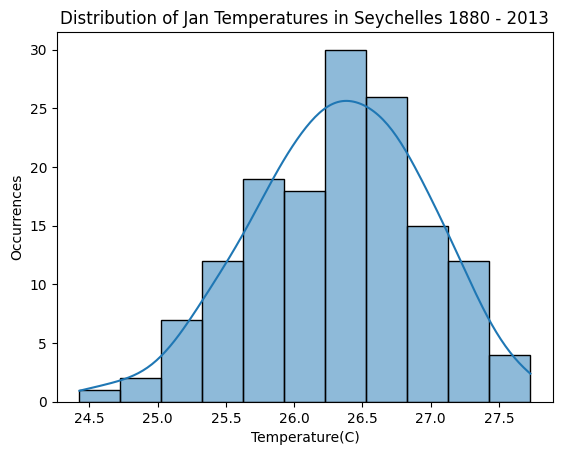

The mean temp is 26.3 degrees Celcius.
The median temp is 26.3 degrees Celcius.
The mode temp is ModeResult(mode=25.927, count=2) degrees Celcius.


In [194]:
average_month_temp_distribution_30yr(df, 'Seychelles', 'Jan')
average_month_temp_distribution(df, 'Seychelles', 'Jan')


Lets choose another country and month and compare the two:


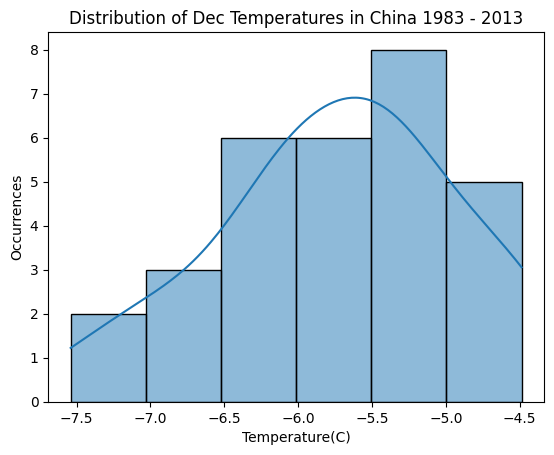

The mean temp is -5.7 degrees Celcius.
The median temp is -5.5 degrees Celcius.
The mode temp is ModeResult(mode=-6.747999999999998, count=2) degrees Celcius.


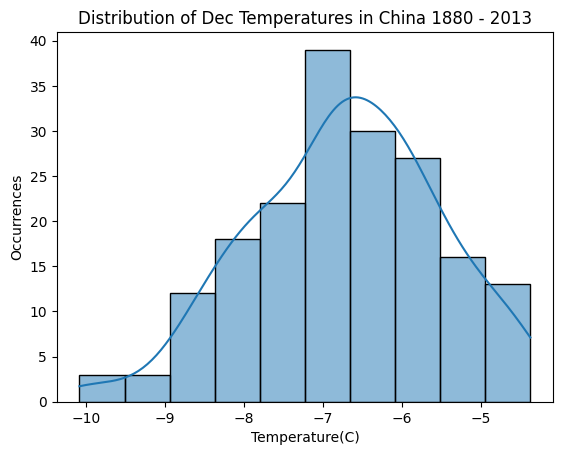

The mean temp is -6.7 degrees Celcius.
The median temp is -6.7 degrees Celcius.
The mode temp is ModeResult(mode=-6.747999999999998, count=3) degrees Celcius.


In [195]:
average_month_temp_distribution_30yr(df, 'China', 'Dec')
average_month_temp_distribution(df, 'China', 'Dec')

Again, this shows that the mean temp of China's Decembers has increased from -6.7 historically, to -5.7 in the past 30 years. 

The distribution is also weighted towards higher temperatures, suggesting a shift, which fits with the current idea that the planet is, on average, warming. 

_______________________________________________________________________________________________________
Looking at one country and one month can be interesting, but really we need to show a global change.

Therefore, I will produce a graph showing every country and month.

As every country and month has a variety of temperature profiles, to really compare them, I need to create individual rolling averages, then compare them to the overall mean temperature.

To begin, lets produce a new df with all the NaN values removed. 
Then I will limit the data to be from 1880 and convert the 'dt' column to datetime format:

In [277]:
df_clean = df.dropna().copy() 
df_clean = df_clean[df_clean['dt']>='1880-01-01']
df_clean['dt'] = pd.to_datetime(df_clean['dt']) 

Next, I need to create a rolling average, but it has to be for each country and month.

To do this, I use `.dt.month` and `.dt.year` to produce 2 new columns labelled with the Month and Year.
Then I use `.sort_values()' to sort the df by Country, then Month, then Year.

Next, I create another column 'RollingAverageTemp', using the `.groupby()` method to ensure each rolling average is only for a distinct Country and Month and the `.rolling()` method with `.mean()` to calculate the rolling average.

The window is the range of the rolling average, with 15 years being calculated using 15 * 12(months).

The index also needs to be reset after sorting the rows using `.reset_index()`

In [278]:
df_clean['Month'] = df_clean['dt'].dt.month
df_clean['Year'] = df_clean['dt'].dt.year
df_clean = df_clean.sort_values(by=['Country', 'Month', 'Year'])

window_size = 15 * 12
df_clean['RollingAverageTemp'] = df_clean.groupby(['Country', 'Month'])['AverageTemperature'].rolling(window=window_size, min_periods=1).mean().reset_index(level=[0,1], drop=True)
df_clean.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Month,Year,RollingAverageTemp
3740,1880-01-01,2.136,1.640,Afghanistan,1,1880,2.136000
3752,1881-01-01,2.524,1.613,Afghanistan,1,1881,2.330000
3764,1882-01-01,0.525,1.157,Afghanistan,1,1882,1.728333
3776,1883-01-01,-0.321,0.947,Afghanistan,1,1883,1.216000
3788,1884-01-01,2.177,0.813,Afghanistan,1,1884,1.408200


Now the rolling average has been generated, the next stage is to calculate the overall mean for each group of data points.

A new df is created, grouping by country and month and giving the mean of the average temperatures for each grouping:

In [279]:
overall_means = df_clean.groupby(['Country', 'Month'])['RollingAverageTemp'].mean().reset_index()
overall_means = overall_means.rename(columns={'RollingAverageTemp': 'OverallMean'})
overall_means.head()

,Country,Month,OverallMean
0,Afghanistan,1,0.281364
1,Afghanistan,2,2.473290
2,Afghanistan,3,8.399767
3,Afghanistan,4,14.350120
4,Afghanistan,5,20.210581


Next, a `.merge()` is performed to combine the 'overall_means' df with 'df_clean':

In [280]:
df_clean = pd.merge(df_clean, overall_means, on=['Country', 'Month'])
df_clean.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Month,Year,RollingAverageTemp,OverallMean
0,1880-01-01,2.136,1.640,Afghanistan,1,1880,2.136000,0.281364
1,1881-01-01,2.524,1.613,Afghanistan,1,1881,2.330000,0.281364
2,1882-01-01,0.525,1.157,Afghanistan,1,1882,1.728333,0.281364
3,1883-01-01,-0.321,0.947,Afghanistan,1,1883,1.216000,0.281364
4,1884-01-01,2.177,0.813,Afghanistan,1,1884,1.408200,0.281364


Then, a new column (the one needed for the graph) is created, giving the Difference between the rolling average temp and the overall average temp for each grouping

In [281]:
df_clean['DiffFromOverallMean'] = df_clean['RollingAverageTemp'] - df_clean['OverallMean']
df_clean.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Month,Year,RollingAverageTemp,OverallMean,DiffFromOverallMean
0,1880-01-01,2.136,1.640,Afghanistan,1,1880,2.136000,0.281364,1.854636
1,1881-01-01,2.524,1.613,Afghanistan,1,1881,2.330000,0.281364,2.048636
2,1882-01-01,0.525,1.157,Afghanistan,1,1882,1.728333,0.281364,1.446970
3,1883-01-01,-0.321,0.947,Afghanistan,1,1883,1.216000,0.281364,0.934636
4,1884-01-01,2.177,0.813,Afghanistan,1,1884,1.408200,0.281364,1.126836


Now the difference has been calculated, each grouping is directly comparable. This now needs to be plotted.

First, I need to offset the first 15 years, due to the fact the Rolling Average is over 15 years, so these first year's rolling average is actually not a valid example to compare against the overall mean.

Then to plot can take place, comparing every country by month for the last 118 years, to see how average temperatures are trending:

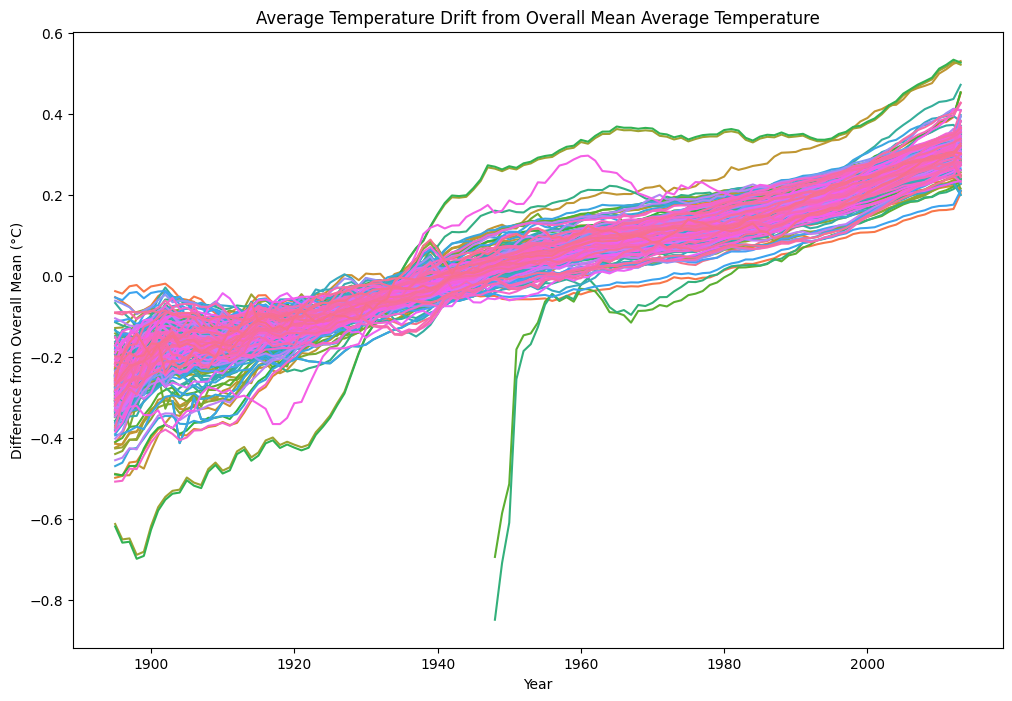

In [282]:
start_date = df_clean['dt'].min() + pd.DateOffset(years=15)
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='DiffFromOverallMean', hue='Country', data=df_clean[df_clean['dt'] >= start_date], errorbar=None, legend=False)
plt.title('Average Temperature Drift from Overall Mean Average Temperature')
plt.xlabel('Year')
plt.ylabel('Difference from Overall Mean (°C)')
plt.show()

As you can see, the direction of the shift is unmistakeable. If there was no gradual increase in global temperatures, the data would produce a relatively horizontal line, with a bit of 'noise'. 

#### The graph does in fact show that since 1895, every country on the planet is becoming, on average, warmer.

So what next?

Its clear from this, a shift is occurring. This will have detrimental effects on the planet and the cause huge issues to our ability to live on this planet.

Next, further data must be collected and analysed to identify the cause and effect of this global shift in average temperatures. The effect of the Oceans, in absorbing this heat must also be identified. There is evidence that the Oceans may be actually absorbing a lot of this temperature increase and the actual potential temperature change may be even greater.